<a href="https://colab.research.google.com/github/radheshyam1111/CN5006/blob/main/Copy_of_CN6005_GroupX_FashionMNIST_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CN6005 - Artificial Intelligence Coursework
## Classification and Clustering Analysis on Real-World Datasets

### Group Information
- **Group Number/Name:** Group 1
- **Members:**
  1. Radhe Shyam Yadav
  2. DB Shrestha
  3. Saurav Razz
  4. Sagar

- **Submission Date:** 20 December 2024
- **Dataset 1 (Part 1):** Fashion MNIST
- **Dataset 2 (Part 2):** Wine Quality Dataset

In [ ]:
# PART 1: MULTICLASS CLASSIFICATION
## Dataset: Fashion MNIST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, f1_score, precision_score, recall_score)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


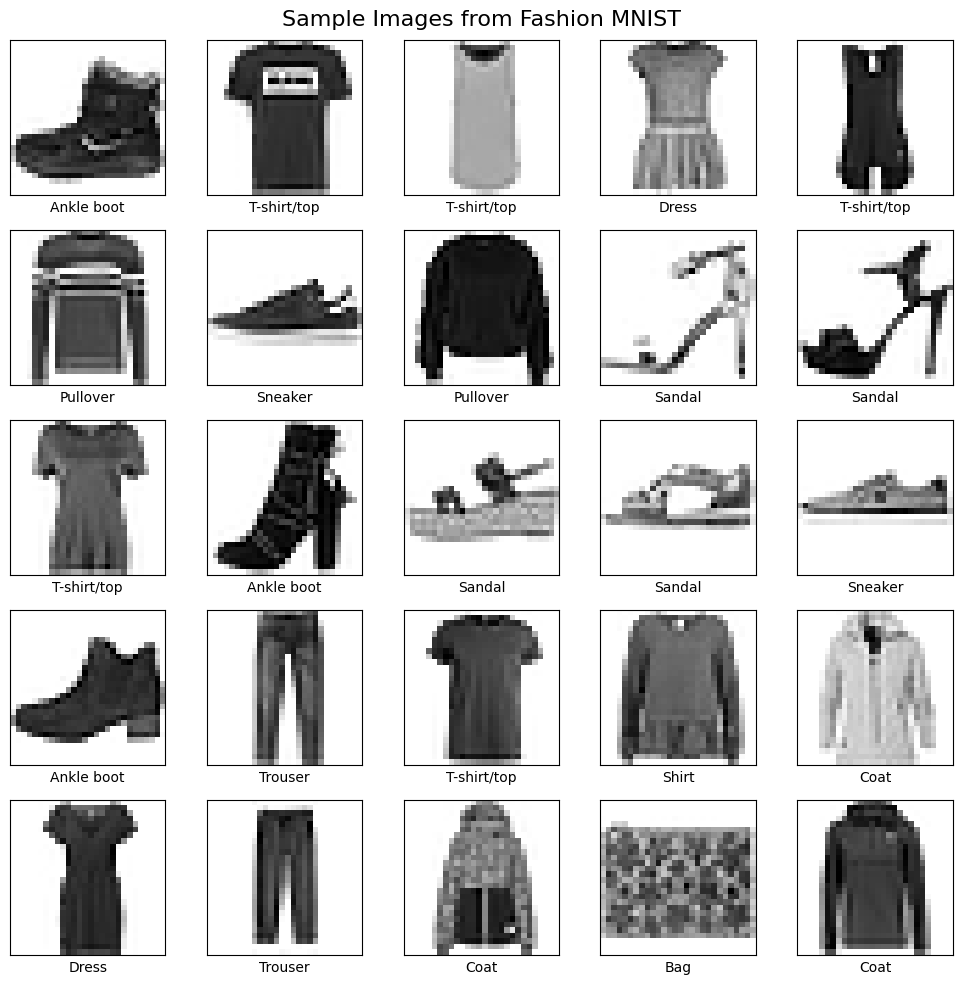

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle('Sample Images from Fashion MNIST', fontsize=16)
plt.tight_layout()
plt.show()

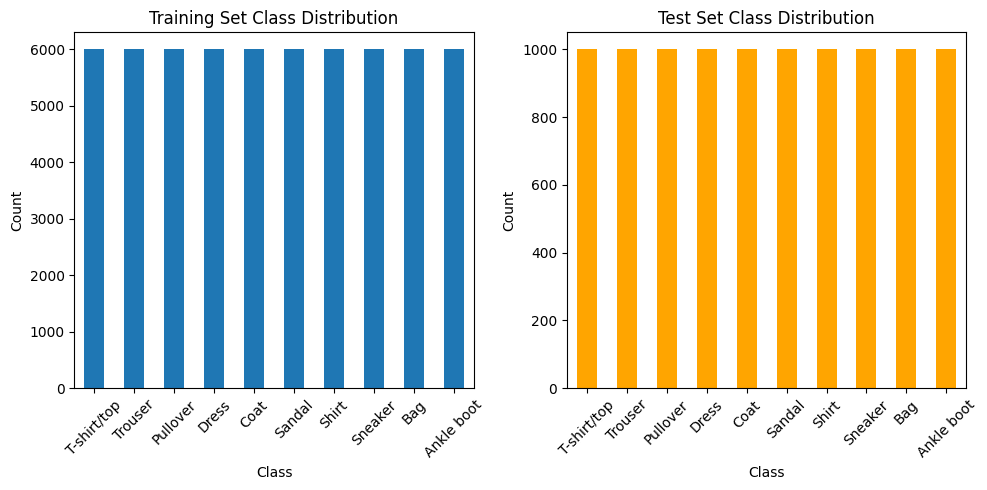

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pd.Series(train_labels).value_counts().sort_index().plot(kind='bar')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)

plt.subplot(1, 2, 2)
pd.Series(test_labels).value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [ ]:
train_images_flat = train_images_norm.reshape(-1, 28*28)
test_images_flat = test_images_norm.reshape(-1, 28*28)

In [ ]:
train_images_cnn = train_images_norm.reshape(-1, 28, 28, 1)
test_images_cnn = test_images_norm.reshape(-1, 28, 28, 1)

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels, 10)
test_labels_cat = keras.utils.to_categorical(test_labels, 10)

print("After preprocessing:")
print(f"Flattened shape (for ML): {train_images_flat.shape}")
print(f"CNN shape: {train_images_cnn.shape}")
print(f"One-hot labels shape: {train_labels_cat.shape}")

After preprocessing:
Flattened shape (for ML): (60000, 784)
CNN shape: (60000, 28, 28, 1)
One-hot labels shape: (60000, 10)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sample_size = 10000  # Use 10000 samples for quick prototyping
X_sample = train_images_flat[:sample_size]
y_sample = train_labels[:sample_size]

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_clf.fit(X_sample, y_sample)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_dt = dt_clf.predict(test_images_flat[:2000])  # Subset for quick evaluation
y_true_dt = test_labels[:2000]

In [ ]:
dt_accuracy = accuracy_score(y_true_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.7500


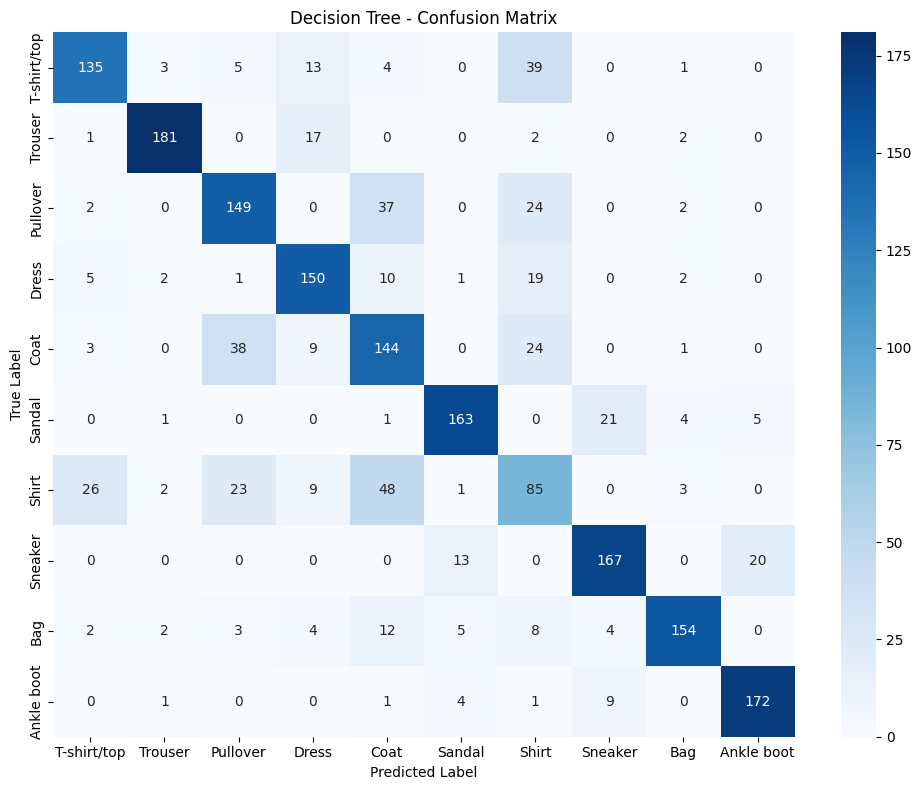

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_dt, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_true_dt, y_pred_dt, target_names=class_names, digits=3))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top      0.776     0.675     0.722       200
     Trouser      0.943     0.892     0.916       203
    Pullover      0.680     0.696     0.688       214
       Dress      0.743     0.789     0.765       190
        Coat      0.560     0.658     0.605       219
      Sandal      0.872     0.836     0.853       195
       Shirt      0.421     0.431     0.426       197
     Sneaker      0.831     0.835     0.833       200
         Bag      0.911     0.794     0.848       194
  Ankle boot      0.873     0.915     0.894       188

    accuracy                          0.750      2000
   macro avg      0.761     0.752     0.755      2000
weighted avg      0.758     0.750     0.753      2000



In [ ]:
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_history = ann_model.fit(
    train_images_norm, train_labels_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6563 - loss: 0.9619 - val_accuracy: 0.8428 - val_loss: 0.4399
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8218 - loss: 0.5014 - val_accuracy: 0.8556 - val_loss: 0.3944
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8416 - loss: 0.4426 - val_accuracy: 0.8619 - val_loss: 0.3937
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8520 - loss: 0.4131 - val_accuracy: 0.8673 - val_loss: 0.3757
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8579 - loss: 0.3962 - val_accuracy: 0.8642 - val_loss: 0.3722
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8616 - loss: 0.3837 - val_accuracy: 0.8687 - val_loss: 0.3563
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8656 - loss: 0.3718 - val_accuracy: 0.8753 - val_loss: 0.3528
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8688 - loss: 0.3590 - val_accuracy: 0

In [ ]:
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images_norm, test_labels_cat, verbose=0)
print(f"ANN Test Accuracy: {ann_test_acc:.4f}")

ANN Test Accuracy: 0.8684


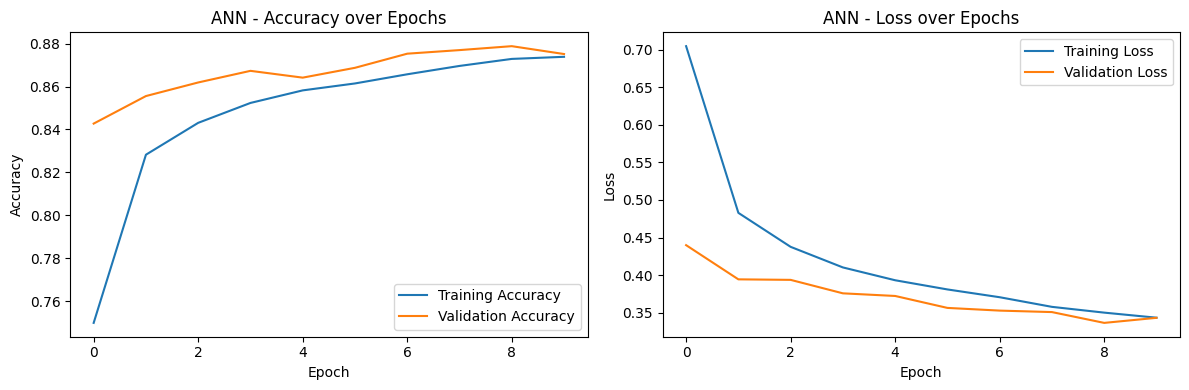

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


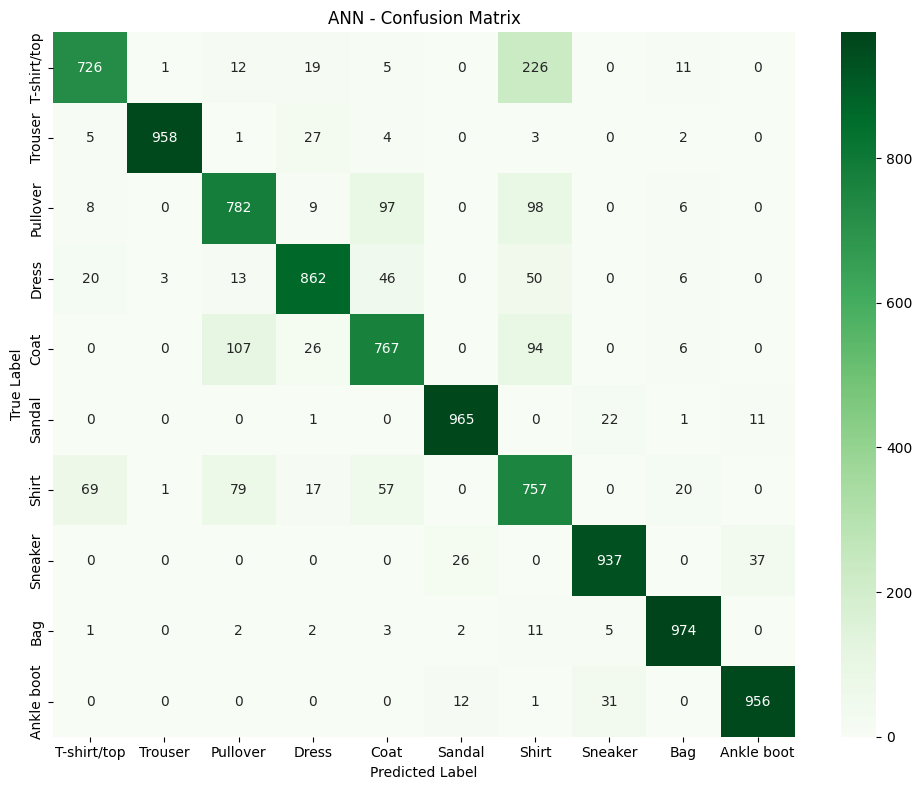

In [ ]:
y_pred_ann = np.argmax(ann_model.predict(test_images_norm), axis=1)
cm_ann = confusion_matrix(test_labels, y_pred_ann)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('ANN - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []


In [ ]:
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_history = cnn_model.fit(
    train_images_cnn, train_labels_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 60ms/step - accuracy: 0.6280 - loss: 1.0546 - val_accuracy: 0.8356 - val_loss: 0.4559
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8224 - loss: 0.4993 - val_accuracy: 0.8662 - val_loss: 0.3676
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8546 - loss: 0.4145 - val_accuracy: 0.8776 - val_loss: 0.3328
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8708 - loss: 0.3683 - val_accuracy: 0.8843 - val_loss: 0.3199
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8803 - loss: 0.3414 - val_accuracy: 0.8946 - val_loss: 0.2941
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.8887 - loss: 0.3145 - val_accuracy: 0.8980 - val_loss: 0.2820
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8943 - loss: 0.2961 - val_accuracy: 0.8983 - val_loss: 0.2803
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9000 - loss: 0.2804 - 

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images_cnn, test_labels_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

CNN Test Accuracy: 0.9049


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


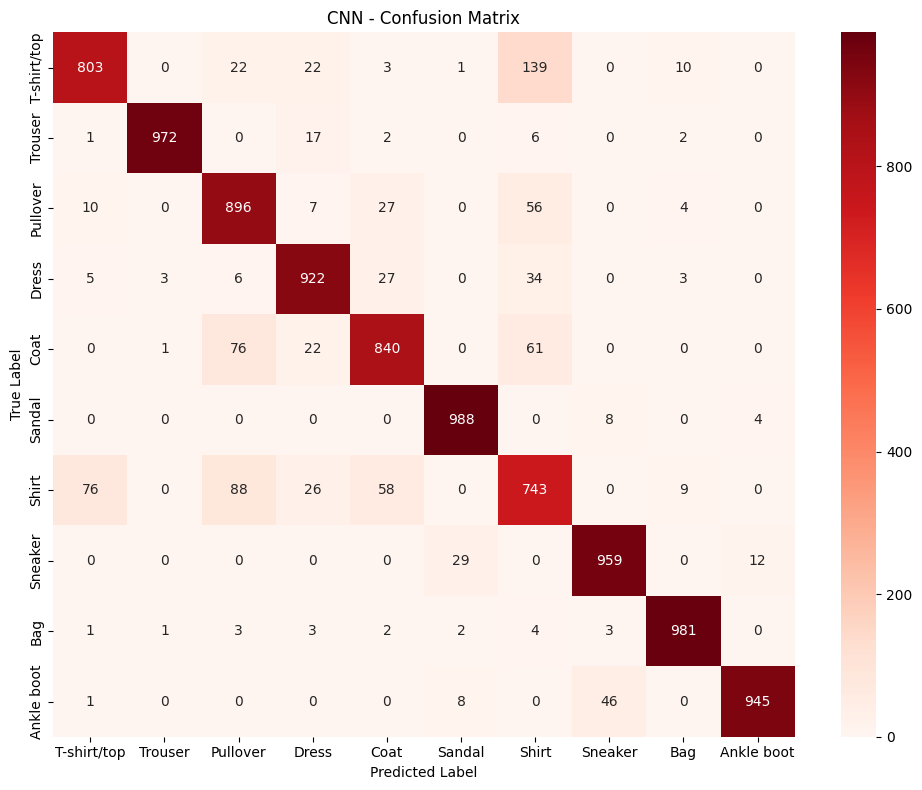

In [ ]:
y_pred_cnn = np.argmax(cnn_model.predict(test_images_cnn), axis=1)
cm_cnn = confusion_matrix(test_labels, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names)
plt.title('CNN - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
comparison_data = {
    'Model': ['Decision Tree', 'ANN', 'CNN'],
    'Test Accuracy': [dt_accuracy, ann_test_acc, cnn_test_acc],
    'Parameters': [dt_clf.tree_.node_count, ann_model.count_params(), cnn_model.count_params()],
    'Training Time (relative)': ['Fast', 'Medium', 'Slow'],
    'Complexity': ['Low', 'Medium', 'High']
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison Table:")
print(comparison_df.to_string(index=False))

Model Comparison Table:
        Model  Test Accuracy  Parameters Training Time (relative) Complexity
Decision Tree         0.7500         657                     Fast        Low
          ANN         0.8684      109386                   Medium     Medium
          CNN         0.9049       93322                     Slow       High


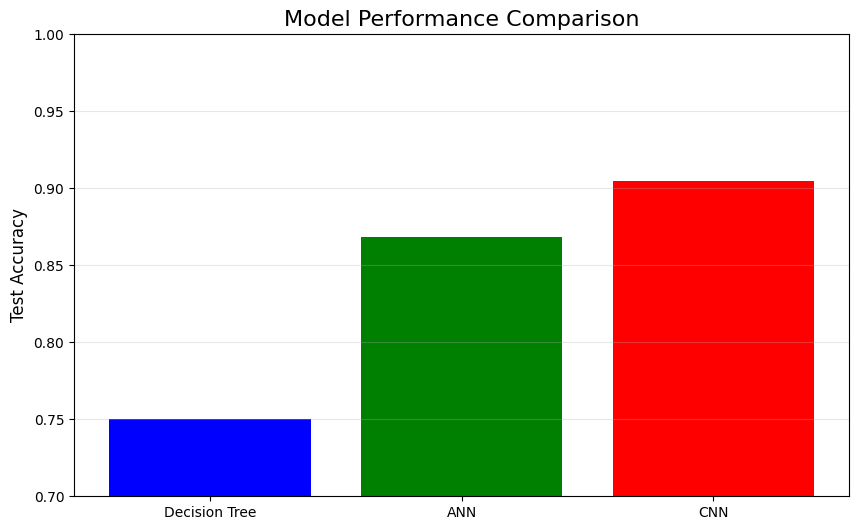

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=['blue', 'green', 'red'])
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)
plt.grid(axis='y', alpha=0.3)

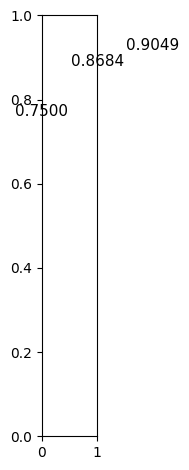

In [ ]:
for bar, acc in zip(bars, comparison_df['Test Accuracy']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{acc:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
print("\nPer-class Accuracy Comparison:")
class_accuracies = []
for i, class_name in enumerate(class_names):
    # Get indices for current class
    idx = test_labels == i

    # Create a specific index for Decision Tree based on its subset of data (y_true_dt)
    dt_idx_for_class_i = y_true_dt == i
    if np.sum(dt_idx_for_class_i) > 0: # Ensure there are samples for this class in the DT subset
        dt_class_acc = accuracy_score(y_true_dt[dt_idx_for_class_i], y_pred_dt[dt_idx_for_class_i])
    else:
        dt_class_acc = np.nan # If no samples for this class in the DT subset, set accuracy to NaN

    # For ANN and CNN, use the 'idx' calculated from the full test_labels (size 10000)
    # 'idx' is already defined from the previous cell's last iteration: idx = test_labels == i
    ann_class_acc = accuracy_score(test_labels[idx], y_pred_ann[idx])
    cnn_class_acc = accuracy_score(test_labels[idx], y_pred_cnn[idx])

    class_accuracies.append([class_name, dt_class_acc, ann_class_acc, cnn_class_acc])

class_df = pd.DataFrame(class_accuracies,
                        columns=['Class', 'Decision Tree', 'ANN', 'CNN'])
print(class_df.to_string(index=False))


Per-class Accuracy Comparison:
      Class  Decision Tree   ANN   CNN
T-shirt/top       0.675000 0.726 0.803
    Trouser       0.891626 0.958 0.972
   Pullover       0.696262 0.782 0.896
      Dress       0.789474 0.862 0.922
       Coat       0.657534 0.767 0.840
     Sandal       0.835897 0.965 0.988
      Shirt       0.431472 0.757 0.743
    Sneaker       0.835000 0.937 0.959
        Bag       0.793814 0.974 0.981
 Ankle boot       0.914894 0.956 0.945


In [ ]:
# This cell's content has been moved to cell GJcGWmG_CUSh for proper per-class accuracy calculation.

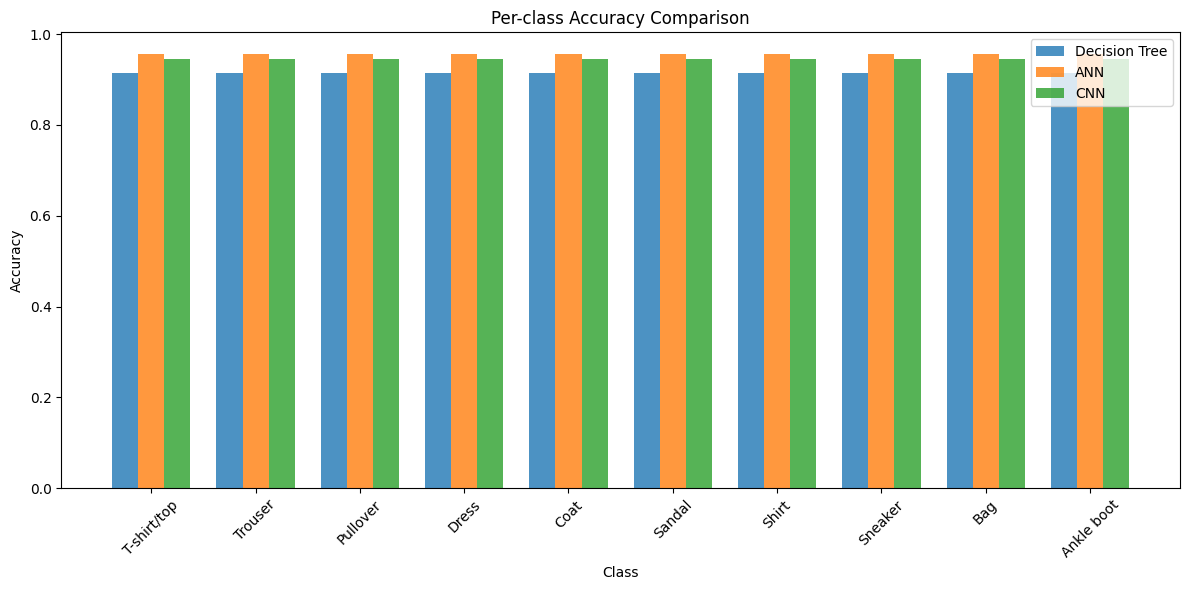

In [ ]:
plt.figure(figsize=(12, 6))
x = np.arange(len(class_names))
width = 0.25

plt.bar(x - width, class_df['Decision Tree'], width, label='Decision Tree', alpha=0.8)
plt.bar(x, class_df['ANN'], width, label='ANN', alpha=0.8)
plt.bar(x + width, class_df['CNN'], width, label='CNN', alpha=0.8)

plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-class Accuracy Comparison')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# PART 2: CLUSTERING ANALYSIS
## Dataset: Wine Quality Dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

print("Dataset shape:", wine_data.shape)
print("\nFirst 5 rows:")
print(wine_data.head())
print("\nDataset info:")
print(wine_data.info())
print("\nMissing values:")
print(wine_data.isnull().sum())

Dataset shape: (1599, 12)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1

In [ ]:
print("Basic Statistics:")
print(wine_data.describe().round(2))

Basic Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01  

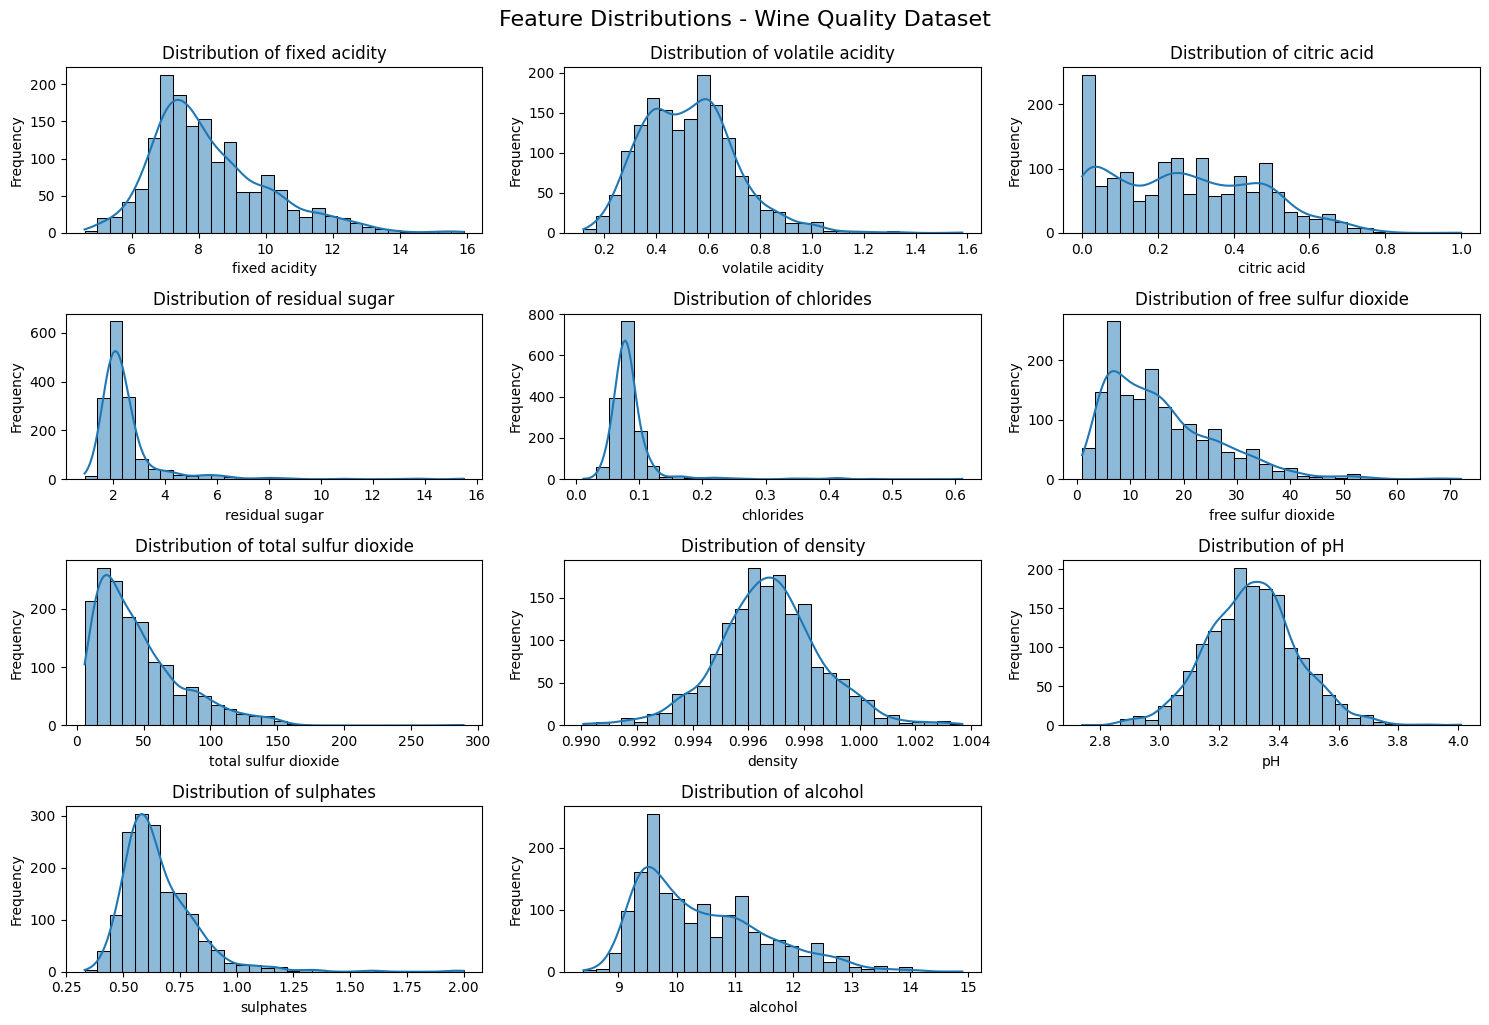

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_data.columns[:-1]):  # Exclude 'quality' column
    plt.subplot(4, 3, i+1)
    sns.histplot(wine_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Feature Distributions - Wine Quality Dataset', y=1.02, fontsize=16)
plt.show()

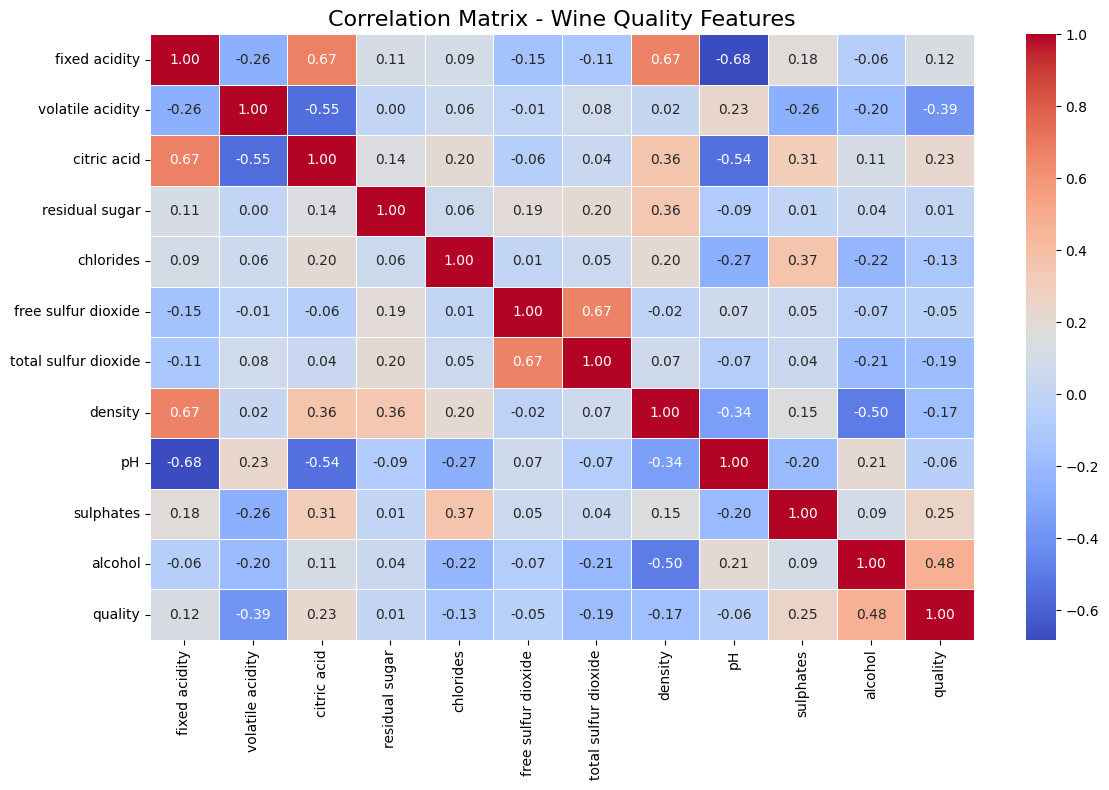

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Wine Quality Features', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
print("Top 10 Correlations (absolute value):")
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
top_corr = corr_pairs[corr_pairs != 1].head(10)
print(top_corr)

Top 10 Correlations (absolute value):
fixed acidity         pH                     -0.682978
pH                    fixed acidity          -0.682978
citric acid           fixed acidity           0.671703
fixed acidity         citric acid             0.671703
density               fixed acidity           0.668047
fixed acidity         density                 0.668047
free sulfur dioxide   total sulfur dioxide    0.667666
total sulfur dioxide  free sulfur dioxide     0.667666
volatile acidity      citric acid            -0.552496
citric acid           volatile acidity       -0.552496
dtype: float64


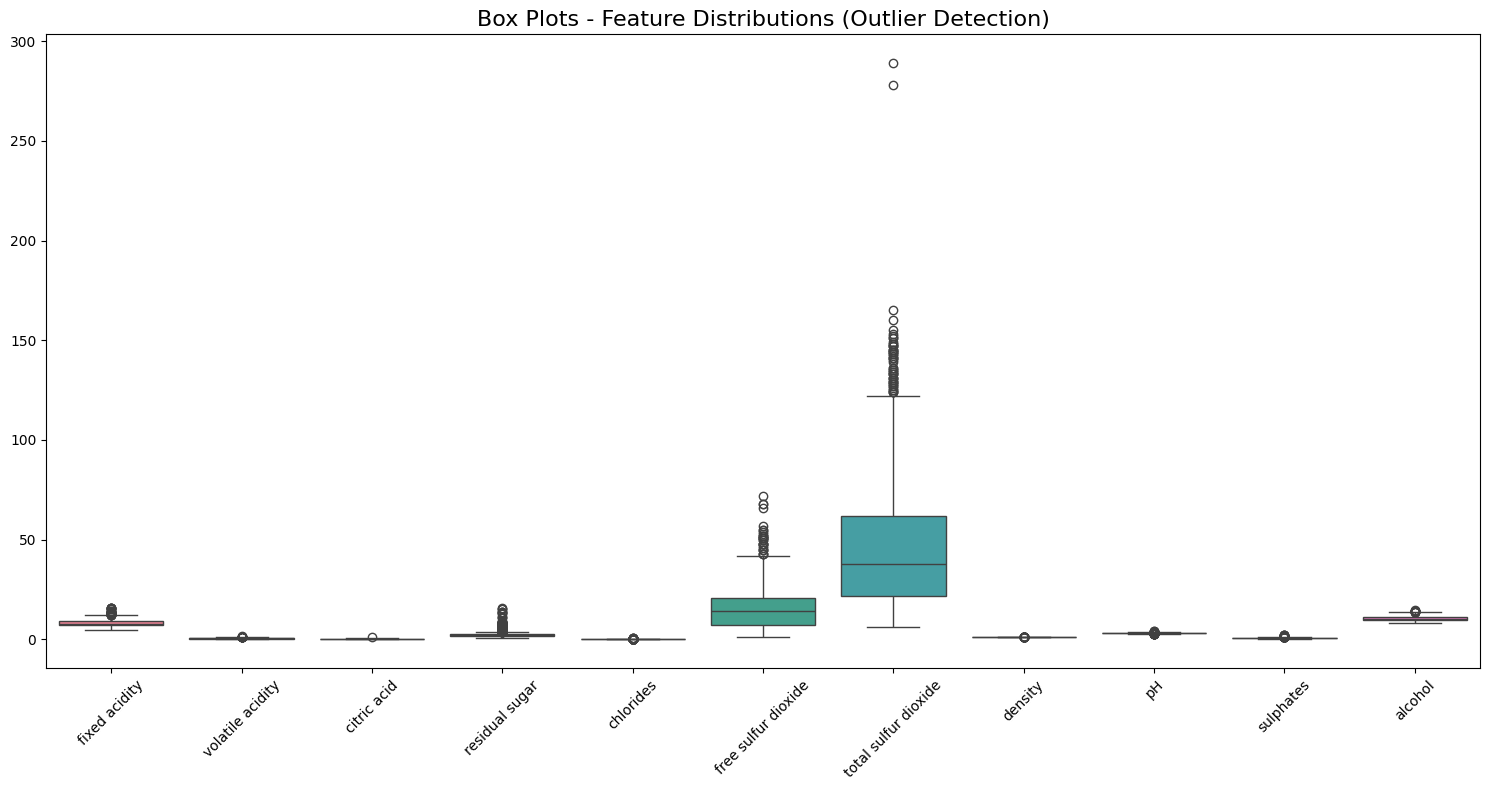

In [ ]:
plt.figure(figsize=(15, 8))
wine_data_box = wine_data.drop(columns=['quality'])
sns.boxplot(data=wine_data_box)
plt.title('Box Plots - Feature Distributions (Outlier Detection)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1599, 11)
Target shape: (1599,)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Scaled features - First 5 rows:")
print(X_scaled_df.head().round(3))

Scaled features - First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528             0.962       -1.391          -0.453     -0.244   
1         -0.299             1.967       -1.391           0.043      0.224   
2         -0.299             1.297       -1.186          -0.169      0.096   
3          1.655            -1.384        1.484          -0.453     -0.265   
4         -0.528             0.962       -1.391          -0.453     -0.244   

   free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0               -0.466                -0.379    0.558  1.289     -0.579   
1                0.873                 0.624    0.028 -0.720      0.129   
2               -0.084                 0.229    0.134 -0.331     -0.048   
3                0.108                 0.412    0.664 -0.979     -0.461   
4               -0.466                -0.379    0.558  1.289     -0.579   

   alcohol  
0   -0.960  
1   -0.585  
2   -0.58

In [ ]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.4f}")

K=2: Inertia=14330.12, Silhouette Score=0.2137
K=3: Inertia=12629.97, Silhouette Score=0.1892
K=4: Inertia=11459.14, Silhouette Score=0.1716
K=5: Inertia=10155.51, Silhouette Score=0.1901
K=6: Inertia=9363.21, Silhouette Score=0.1947
K=7: Inertia=8645.20, Silhouette Score=0.1926
K=8: Inertia=8298.97, Silhouette Score=0.1495
K=9: Inertia=7969.34, Silhouette Score=0.1534
K=10: Inertia=7671.02, Silhouette Score=0.1574


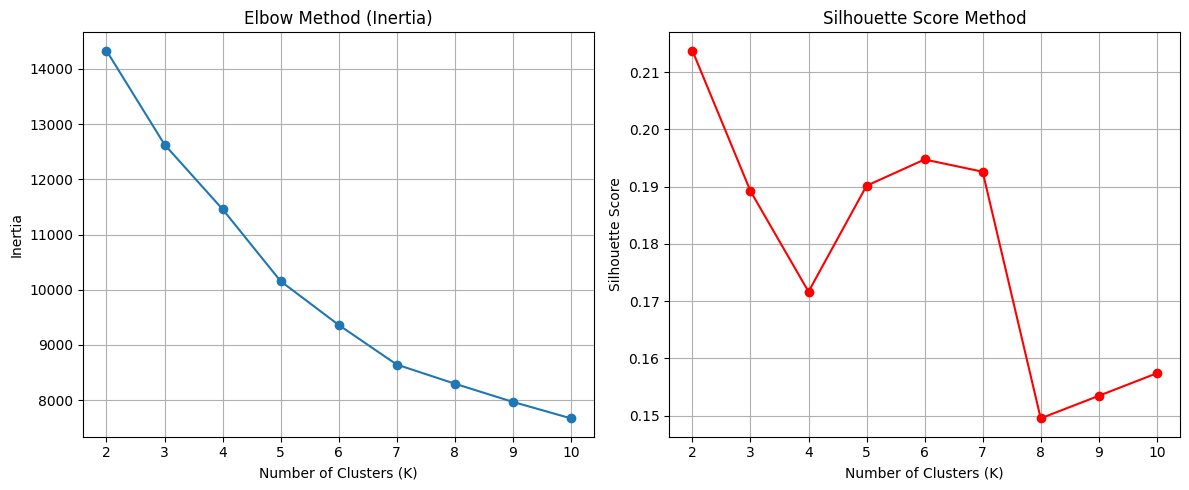

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()


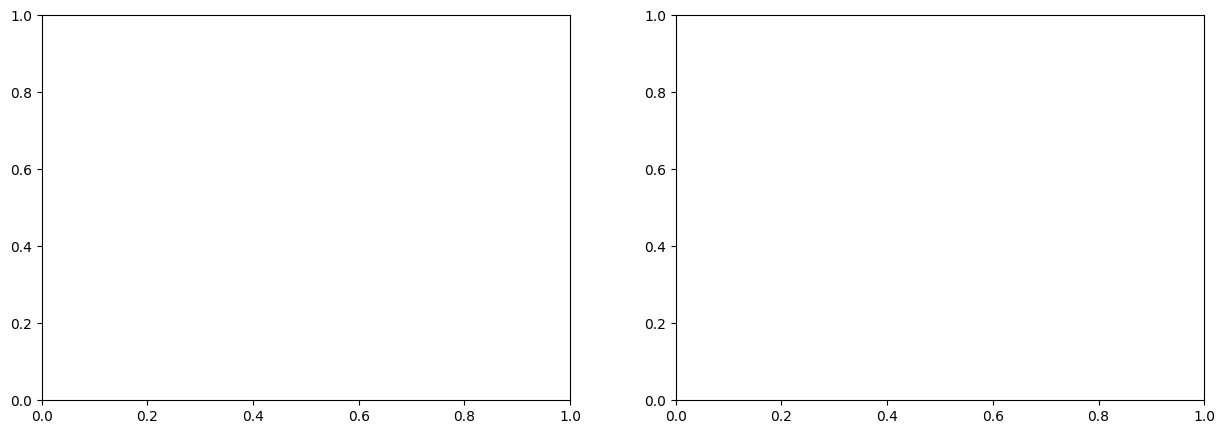

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [ ]:
axes[0].plot(k_range, inertia, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].grid(True, alpha=0.3)

In [ ]:
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores for Different K')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
optimal_k = 2  # Based on silhouette score analysis
print(f"\nUsing optimal k = {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels_


Using optimal k = 2


In [ ]:
wine_data_clustered = wine_data.copy()
wine_data_clustered['Cluster'] = labels

print("\nCluster distribution:")
print(wine_data_clustered['Cluster'].value_counts().sort_index())


Cluster distribution:
Cluster
0    722
1    502
2    375
Name: count, dtype: int64


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

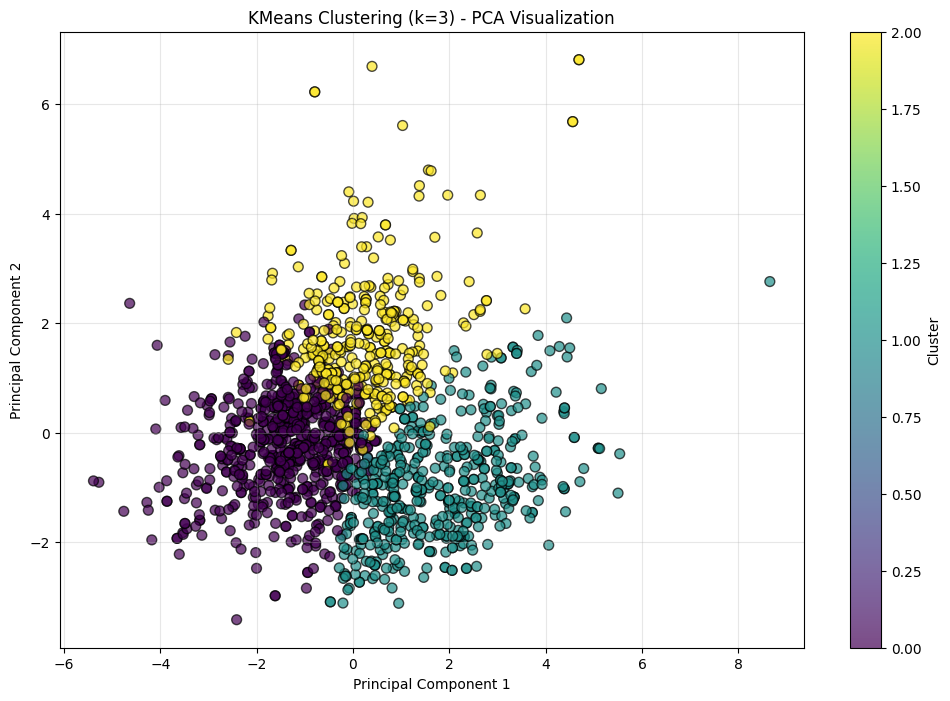

In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels
pca_df['Quality'] = y.values

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
                     c=pca_df['Cluster'], cmap='viridis',
                     s=50, alpha=0.7, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KMeans Clustering (k={optimal_k}) - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

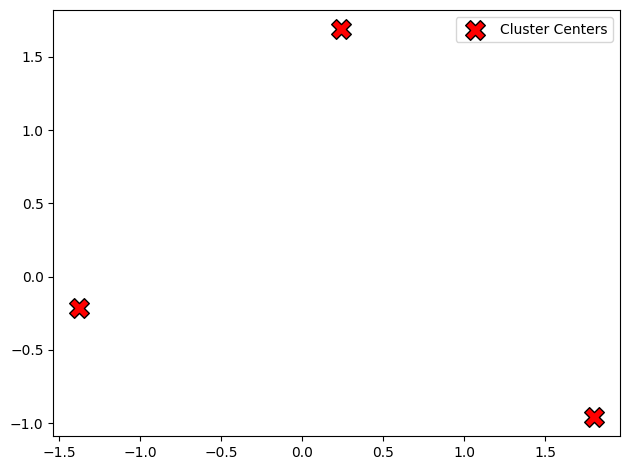

In [ ]:
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red', s=200, marker='X', label='Cluster Centers', edgecolors='black')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n=== Cluster Analysis ===")



=== Cluster Analysis ===


In [ ]:
cluster_means = wine_data_clustered.groupby('Cluster').mean().round(3)
print("\nMean feature values per cluster:")
print(cluster_means)



Mean feature values per cluster:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0                7.190             0.609        0.123           2.214   
1               10.067             0.405        0.470           2.583   
2                8.155             0.535        0.290           3.105   

         chlorides  free sulfur dioxide  total sulfur dioxide  density     pH  \
Cluster                                                                         
0            0.079               13.508                34.895    0.996  3.406   
1            0.100               10.888                30.627    0.998  3.195   
2            0.087               27.108                89.955    0.997  3.284   

         sulphates  alcohol  quality  
Cluster                               
0            0.609   10.494    5.553  
1            0.752   10.724    5.960  
2            0.627    9.883    5.363  

In [ ]:
print("\nOverall means:")
print(wine_data.mean().round(3))


Overall means:
fixed acidity            8.320
volatile acidity         0.528
citric acid              0.271
residual sugar           2.539
chlorides                0.087
free sulfur dioxide     15.875
total sulfur dioxide    46.468
density                  0.997
pH                       3.311
sulphates                0.658
alcohol                 10.423
quality                  5.636
dtype: float64


<Figure size 1200x600 with 0 Axes>

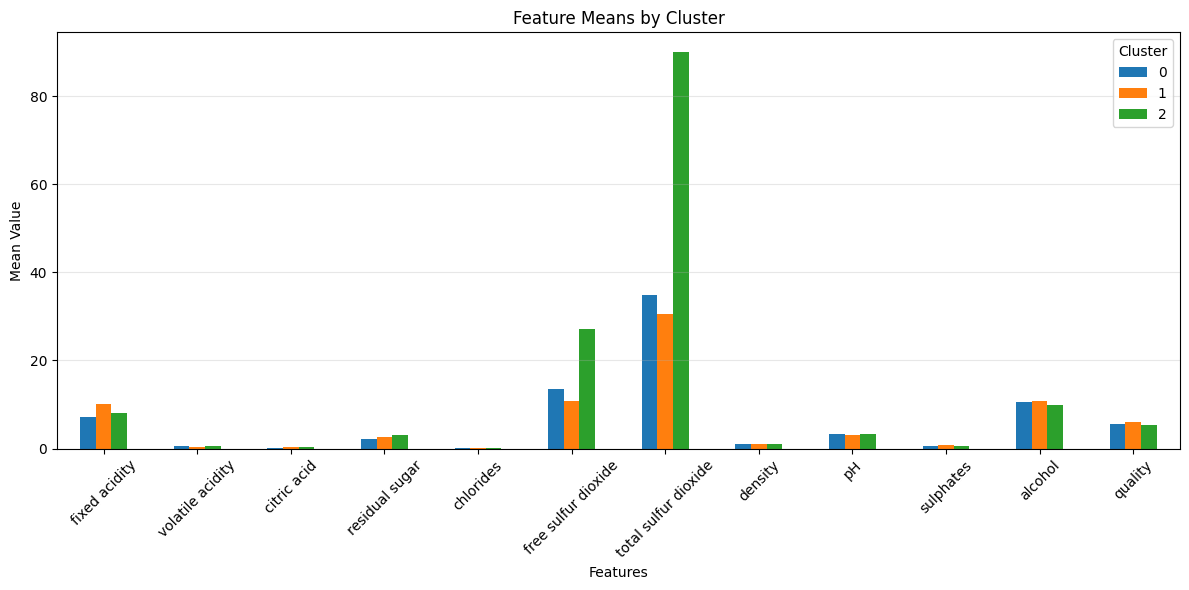

In [ ]:
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
sample_silhouette_values = silhouette_samples(X_scaled, labels)


Text(0, 0.5, 'Cluster Label')

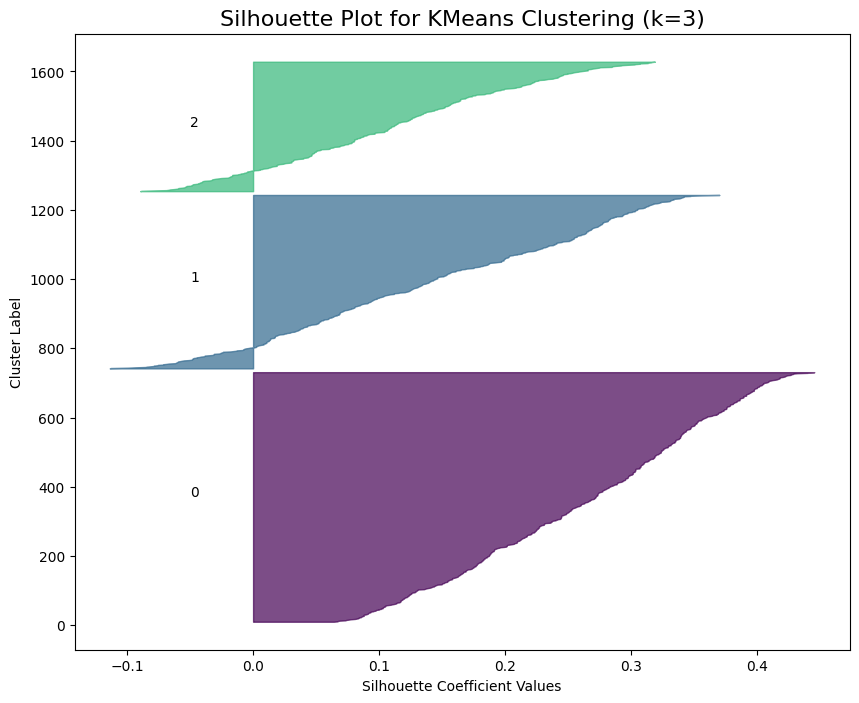

In [ ]:
plt.figure(figsize=(10, 8))
y_lower = 10

for i in range(optimal_k):
    # Aggregate silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title(f"Silhouette Plot for KMeans Clustering (k={optimal_k})", fontsize=16)
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")


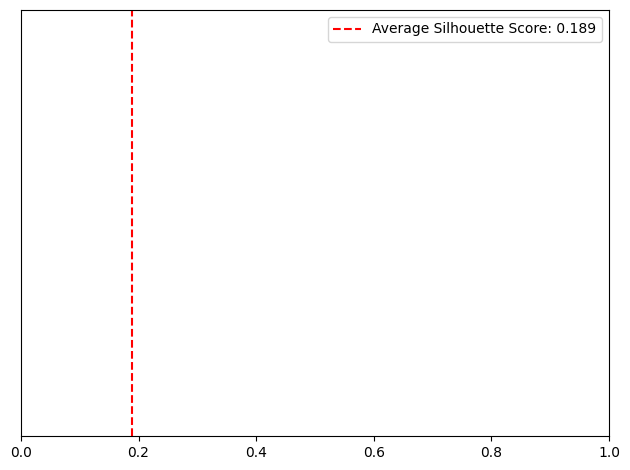


Overall Silhouette Score: 0.1892


In [ ]:
avg_silhouette = silhouette_score(X_scaled, labels)
plt.axvline(x=avg_silhouette, color="red", linestyle="--",
            label=f'Average Silhouette Score: {avg_silhouette:.3f}')
plt.legend()

plt.yticks([])
plt.tight_layout()
plt.show()

print(f"\nOverall Silhouette Score: {avg_silhouette:.4f}")

In [ ]:
clustering_results = {
    'Optimal K': [optimal_k],
    'Silhouette Score': [avg_silhouette],
    'Inertia': [kmeans_final.inertia_],
    'Cluster Sizes': [str(wine_data_clustered['Cluster'].value_counts().to_dict())]
}

results_df = pd.DataFrame(clustering_results)
print("Clustering Results Summary:")
print(results_df.to_string(index=False))

Clustering Results Summary:
 Optimal K  Silhouette Score      Inertia            Cluster Sizes
         3          0.189204 12629.974592 {0: 722, 1: 502, 2: 375}


In [ ]:
print("\n=== Key Insights ===")
print("1. Based on silhouette analysis, optimal number of clusters appears to be", optimal_k)
print("2. Cluster characteristics:")
for cluster_num in range(optimal_k):
    cluster_data = wine_data_clustered[wine_data_clustered['Cluster'] == cluster_num]
    avg_quality = cluster_data['quality'].mean()
    print(f"   Cluster {cluster_num}: {len(cluster_data)} samples, Avg Quality: {avg_quality:.2f}")

print("\n3. The clustering reveals natural groupings in wine characteristics")
print("4. Further analysis could relate clusters to actual wine quality ratings")


=== Key Insights ===
1. Based on silhouette analysis, optimal number of clusters appears to be 3
2. Cluster characteristics:
   Cluster 0: 722 samples, Avg Quality: 5.55
   Cluster 1: 502 samples, Avg Quality: 5.96
   Cluster 2: 375 samples, Avg Quality: 5.36

3. The clustering reveals natural groupings in wine characteristics
4. Further analysis could relate clusters to actual wine quality ratings
